This program trains a neural network model to classify images of clothing, like sneakers and shirts. 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

1.11.0


import the MNIST dataset

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.

In [4]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

Now Exploring the data

In [6]:
train_images.shape

(50000, 32, 32, 3)

there are 50k labels in the training set

In [7]:
len(train_labels)

50000

Each label is an integer between 0 and 9

In [8]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

there are 10k images  in the test set. each image represents 28X28 pixels

In [9]:
test_images.shape

(10000, 32, 32, 3)

the test set contains 10k images labels

In [10]:
len(test_labels)

10000

Now preprocessing the data

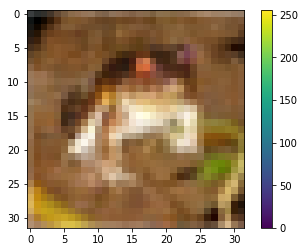

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Here before feeding the Neural Network scale the value in the range of 0 to 1. 

for this,cast the datatype of the image components from an integer to a float and devide by 255

it is important that the training set and testing set are preprocessed in the same way

In [12]:
train_images=train_images/255.0
test_images = test_images/255.0


to display the first 25 images from the training set and display the class name below each image. 

verify that the data is in the correct format and is ready to build and train the network

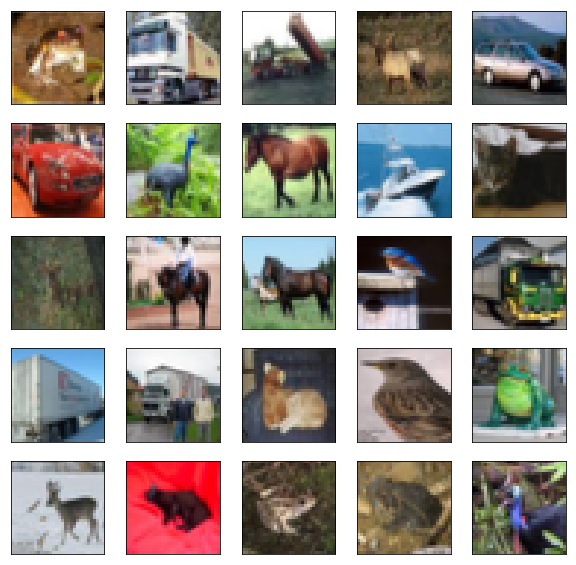

In [13]:
plt.figure(figsize = (10,10))
for i in range (25):
    plt.subplot (5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

## Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. 

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

## compile the model

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',    ## loss function
             metrics=['accuracy'])

## train the Model

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 5s 104us/step - loss: 1.9170 - acc: 0.3098
Epoch 2/5
50000/50000 [==============================] - 5s 98us/step - loss: 1.7768 - acc: 0.3627
Epoch 3/5
50000/50000 [==============================] - 5s 101us/step - loss: 1.7284 - acc: 0.3831
Epoch 4/5
50000/50000 [==============================] - 5s 103us/step - loss: 1.7041 - acc: 0.3890
Epoch 5/5
50000/50000 [==============================] - 6s 117us/step - loss: 1.6886 - acc: 0.3918


## Evaluate accuracy

Compare how the model performs on the test dataset

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('test accuracy:', test_accuracy)

10000/10000 [==============================] - 0s 47us/step
test accuracy: 0.3968


## Make Predictions

In [18]:
predictions = model.predict(test_images)

Here the model has predicted the label for each image in the testing set.

below shows the first Prediction:

In [19]:
predictions[0]

array([0.04547689, 0.11627753, 0.02808136, 0.13499953, 0.01786721,
       0.08039194, 0.14945005, 0.00121627, 0.4066096 , 0.01962961],
      dtype=float32)

above shows the prediction array of 10 numbers. this shows the confidence of the model that the image corresponds to 10 different article of clothing

below shows that which label has the highest confidence value

In [20]:
np.argmax(predictions[0])

8

Now check the test label to see this is correct

In [21]:
test_labels[0]

array([3])

Now graph this to look at the full set of 10 channels

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                               true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  

Now lets look at the 3rd image, predictions and predicted array

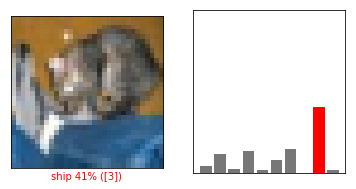

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Ploting several images with their predictions. correct predictionlabel are blue and incorrect prediction labels are red.

the number gives percentage (out of 100) for the predicted label.

it can be wrong even when very confident.

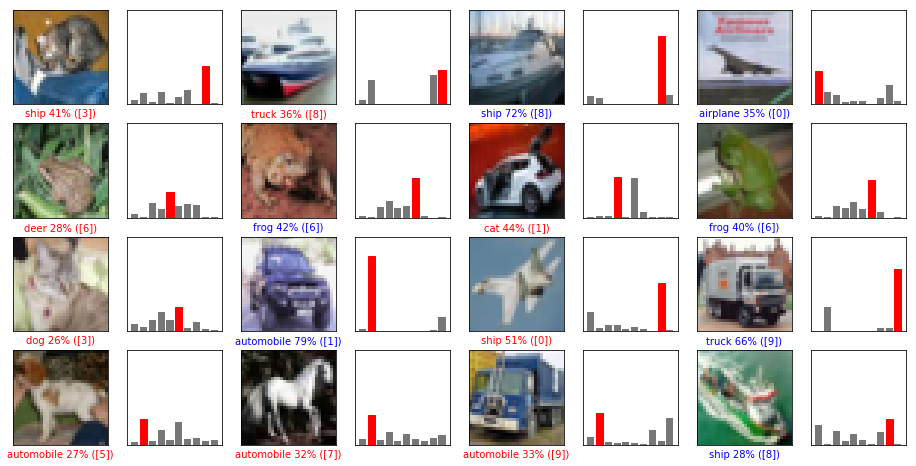

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

finally use the trained model to predict a single image

In [25]:
img = test_images[0]                 ## select img from test dataset
print (img.shape)

(32, 32, 3)


tensorflow keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [26]:
img = (np.expand_dims(img,0))
print (img.shape)

(1, 32, 32, 3)


Now predict the image

In [27]:
predictions_single = model.predict(img)
print(predictions_single)

[[0.04547691 0.11627761 0.02808138 0.13499957 0.01786723 0.08039197
  0.14945006 0.00121627 0.4066094  0.01962964]]


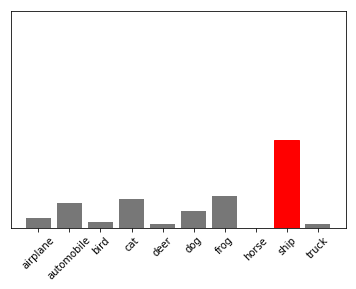

In [28]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

8